#Here we are importing necessary libraries

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
# from google.colab import files
import os

#Here we are downloading NLTK resources

In [8]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatizer support
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Connecting Google Drive

#Here we are Loading the Dataset

In [9]:
import pandas as pd

file_path = "/Users/kunalkoshta/Desktop/deepak/WELFake_Dataset.csv"  # Update this
df = pd.read_csv(file_path)

print(df.shape)  # Check dataset size
df.head()  # View first 5 rows

(72134, 4)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


#Preprocess the Dataset
Now, let's clean the data

Check for missing values

In [10]:
print(df.isnull().sum())  # Shows missing values in each column

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


Drop missing values (if necessary)

In [11]:
df = df.dropna()
print(df.shape)  # Check new dataset size after cleaning

(71537, 4)


Remove duplicate rows (if any)

In [12]:
df = df.drop_duplicates()
print(df.shape)  # Check dataset size after removing duplicates

(71537, 4)


#Check the dataset structure

In [13]:
print(df.info())  # Shows column names and data types

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB
None


#Check Data Distribution
If your dataset has a "label" column (Fake / Real), check distribution

Now, your dataset is loaded and cleaned

In [14]:
print(df["label"].value_counts())  # Count number of Fake & Real news

label
1    36509
0    35028
Name: count, dtype: int64


#Data set imbalance ratio calculation

In [15]:
imbalance_ratio = df['label'].value_counts().max() / df['label'].value_counts().min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.04


#we are using bar chart to see the imbalance in data.

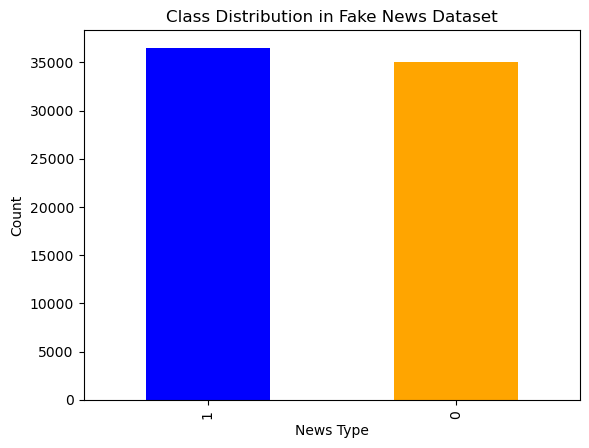

In [16]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Class Distribution in Fake News Dataset")
plt.show()

Steps for Text Preprocessing
 * Convert text to lowercase (to maintain consistency)
* Remove special characters, numbers, and punctuation
* Remove stopwords (e.g., is, the, in, and)
* Apply stemming (reduce words to root form, e.g., running → run)
* Convert text into numerical form (TF-IDF)

 Load the Dataset
Since you've already loaded the dataset, let’s check the text column:

In [17]:
print(df.head())  # View dataset structure

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
5  All we can say on this one is it s about time ...      1  


Install and Import Libraries

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkoshta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Convert Text into Numerical Features (TF-IDF Vectorization)

Since machine learning models can’t process text directly, we convert text into numerical vectors. The TF-IDF (Term Frequency-Inverse Document Frequency) method works well for NLP tasks like Fake News Detection.

In [19]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = re.findall(r'\b\w+\b', text)  # This will extract words using regular expression
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)


# Sample text to test the preprocessing
sample_text = "This is a sample sentence for testing the text processing pipeline."

# Preprocess the text
processed_text = preprocess_text(sample_text)
print(processed_text)


sample sentence testing text processing pipeline


Why TF-IDF is Useful for Fake News Detection?


* Removes common words that don’t add meaning (e.g., "the", "is").
* Assigns higher importance to unique words (e.g., "propaganda", "hoax").
* Prepares data for ML models like Logistic Regression, SVM, or Neural Networks.



In [20]:
# Apply preprocessing to the 'text' column
df["cleaned_text"] = df["text"].apply(preprocess_text)

# Check if 'cleaned_text' is created
print(df.columns)  # Ensure 'cleaned_text' exists

Index(['Unnamed: 0', 'title', 'text', 'label', 'cleaned_text'], dtype='object')


max_features=5000: Keeps only the top 5000 most important words (to reduce computational load).

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to 5000 features
X = vectorizer.fit_transform(df["cleaned_text"])

print(X.shape)  # Check shape of feature matrix

(71537, 5000)


 Prepare Labels for Model Training
Convert labels (Fake, Real) into numerical format (0, 1):

In [22]:
y = df["label"].map({"Fake": 0, "Real": 1})  # Encode Fake as 0, Real as 1

Here we will train our model

#Logistic Regression model

In [23]:
# Check if there are NaN values in y
print(f"NaN values in target variable: {y.isna().sum()}")

# Remove rows where y is NaN
df_clean = df.dropna(subset=['text', 'label'])  # Assuming 'text' is your feature column and 'label' is the target column

# Update X and y
X_clean = vectorizer.fit_transform(df_clean["cleaned_text"])
y_clean = df_clean["label"]

# Split data again (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


NaN values in target variable: 71537
Training Samples: 57229, Testing Samples: 14308
Accuracy: 0.9451
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7081
           1       0.94      0.95      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



Saving the Model and vectorizer → So we can deploy it.

In [24]:
import joblib
joblib.dump(lr_model, 'Fake_News_Model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved.")

Model and vectorizer saved.


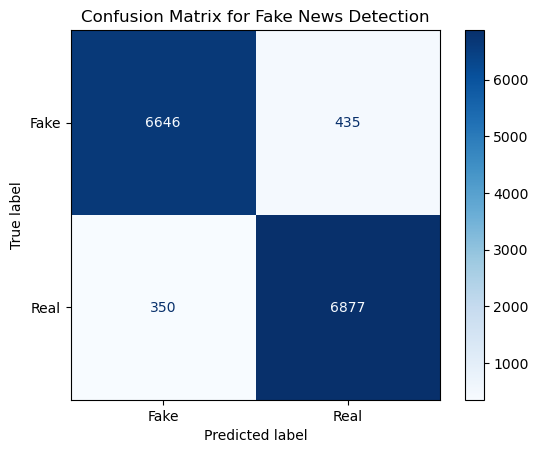

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Fake News Detection")
plt.show()

checking the file, if they existed in colab temporary.

In [ ]:
import os
os.listdir()

['.config',
 'tfidf_vectorizer.pkl',
 'drive',
 'Fake_News_Model.pkl',
 'sample_data']

In [27]:
# Load the saved model and vectorizer
model = joblib.load("Fake_News_Model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Preprocess the sample text
sample_text = preprocess_text("Dead broke! yes, that another doozy that Hilla..")

# Transform and convert the vector to dense
sample_vector = vectorizer.transform([sample_text]).toarray()

# Predict using the dense vector
prediction = model.predict(sample_vector)

# Print the prediction result
print("Prediction:", "Fake" if prediction[0] == 0 else "Real")


Prediction: Real
